## <p style="font-family:newtimeroman;font-size:150%;text-align:center;">Brain Tumor Detection using<br>EfficientNetv2s, Xception, ResNet50</p>

# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Introduction</p>

In my previous exploration of the Brain Tumor dataset ([Brain Tumor Detection using Tensorflow CNN](https://www.kaggle.com/code/anitarostami/brain-tumor-detection-using-tensorflow-cnn#notebook-container)), I delved into Image Classification using CNNs and compared augmented and unaugmented models. While both approaches provided insights, the unaugmented model shown potential for balancing accuracy and computational efficiency . However, due to the dataset's size limits, reaching ideal accuracy remained difficult. In this new notebook, I switch to Transfer Learning and use pre-trained models like EfficientNetB0, ResNet101, and Xception to significantly enhance classification accuracy.

<div class="alert alert-block alert-info"> <b>NOTE</b> I hope you found value and insights in this notebook. If you have any suggestions or thoughts, please feel free to share them. If you enjoyed the content, consider giving it an upvote. Thank you! </div>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. DATA PREPRATION](#2)
    
* [2. TRANSFER LEARNING](#3)
    
* [3. EfficientNetB0](#4)
    
* [4. ResNet101](#5)   
      
* [6. Xception](#6)
    
* [7. CONCLUSION](#7)

<a id="1"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Importing Libraries</p>

In [1]:
!pip install mplcyberpunk

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import mplcyberpunk
#plt.style.use("cyberpunk")
import cv2
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from tqdm import tqdm

#from warnings import filterwarnings
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

<a id="2"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Data Preperation</p>

In [2]:
import os

input_path = r"D:\SKRIPSI\Bismillah Skripsi Rampung\input"
print("Isi folder input:", os.listdir(input_path))


Isi folder input: ['Testing', 'Training']


In [3]:
# Periksa isi folder Training
train_path = os.path.join(input_path, 'Training')
print("Isi folder Training:", os.listdir(train_path))

# Periksa isi folder Testing
test_path = os.path.join(input_path, 'Testing')
print("Isi folder Testing:", os.listdir(test_path))


Isi folder Training: ['glioma', 'meningioma', 'notumor', 'pituitary']
Isi folder Testing: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [4]:
train_path = r"D:\SKRIPSI\Bismillah Skripsi Rampung\input\Training"
test_path = r"D:\SKRIPSI\Bismillah Skripsi Rampung\input\Testing"

print("Isi folder Training:", os.listdir(train_path))
print("Isi folder Testing:", os.listdir(test_path))


Isi folder Training: ['glioma', 'meningioma', 'notumor', 'pituitary']
Isi folder Testing: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Inisialisasi
X_train = []
y_train = []
labels = ['glioma', 'notumor', 'meningioma', 'pituitary']

image_size = 150

# Load data training
for i in labels:
    folderPath = os.path.join(r'D:\SKRIPSI\Bismillah Skripsi Rampung\input\Training', i)
    if not os.path.exists(folderPath):
        print(f"Folder tidak ditemukan: {folderPath}")
        continue
    for j in tqdm(os.listdir(folderPath), desc=f"Memproses {i} di Training"):
        img_path = os.path.join(folderPath, j)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            y_train.append(i)
        else:
            print(f"Error membaca gambar: {img_path}")

# Load data testing
for i in labels:
    folderPath = os.path.join(r'D:\SKRIPSI\Bismillah Skripsi Rampung\input\Testing', i)
    if not os.path.exists(folderPath):
        print(f"Folder tidak ditemukan: {folderPath}")
        continue
    for j in tqdm(os.listdir(folderPath), desc=f"Memproses {i} di Testing"):
        img_path = os.path.join(folderPath, j)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            y_train.append(i)
        else:
            print(f"Error membaca gambar: {img_path}")

# Konversi ke array numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")


Memproses pituitary di Testing: 100%|██████████| 300/300 [00:00<00:00, 541.70it/s]


Shape X_train: (7023, 150, 150, 3), y_train: (7023,)


## Data visualization

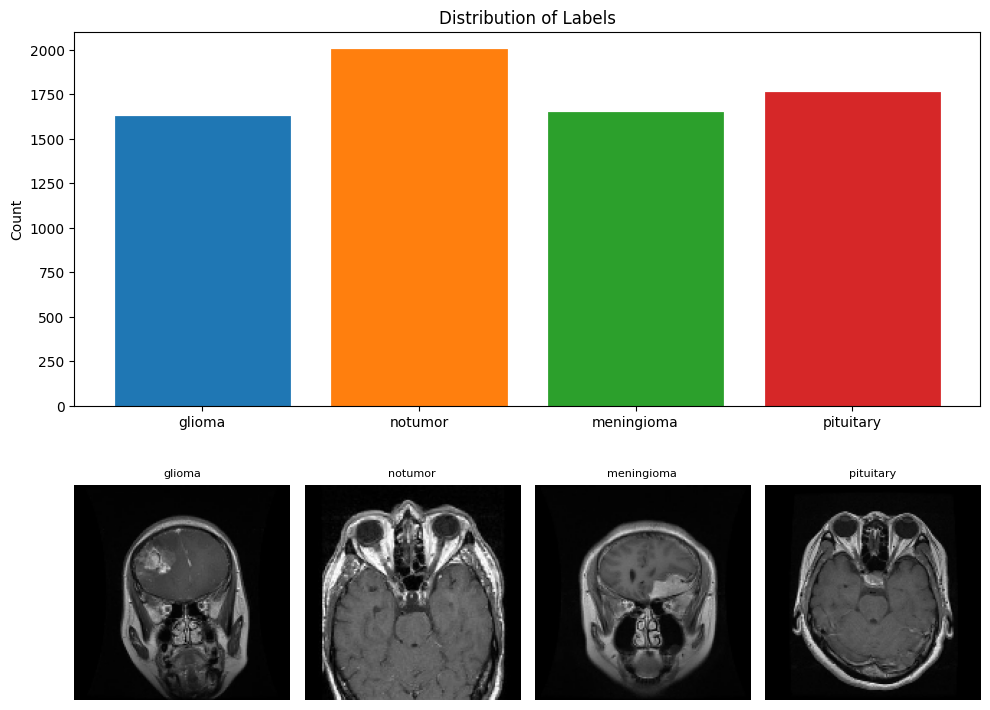

In [6]:
# Hitung jumlah label
label_counts = {label: np.sum(y_train == label) for label in labels}

# Ukuran figure
plt.figure(figsize=(10, 8))

# Warna dasar untuk gradien
colors = ["C0", "C1", "C2", "C3"]

# Bagian histogram
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)

# Tambahkan efek gradien secara manual
for bar, color in zip(bars, colors):
    bar.set_edgecolor(color)
    bar.set_linewidth(2)
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Bagian gambar sampel
k = 0
for i, label in enumerate(labels):
    # Cari gambar pertama dari label tersebut
    for j in range(len(y_train)):
        if y_train[j] == label:
            plt.subplot(2, 4, k + 5)
            plt.imshow(X_train[j].astype('uint8'))  # Pastikan gambar dalam format uint8 untuk plt.imshow
            plt.axis('off')
            plt.title(label, fontsize=8)
            k += 1
            break

plt.tight_layout()
plt.show()

### Dataset Split: Train and Test

In [7]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

### One-Hot Encoding Labels

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

<a id="3"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Transfer Learning</p>

Transfer learning uses knowledge learned from training on one task to improve learning on another, which is especially beneficial when data is limited. The model can learn more quickly and avoid overfitting by using learned features from a related task. It works by starting with a pre-trained model's base layers, identifying transfer layers capturing relevant information, and fine-tuning these layers with new task data to adapt the model efficiently. This method is particularly useful in deep learning for tasks involving image recognition and classification.

**Fundamental Components and Techniques in Neural Network Training**

1. Dense: A fully connected layer that learns complicated patterns in data by connecting all neurons in the previous and subsequent layers.

2. GlobalAveragePooling2D: A pooling layer that determines the average value of each feature map across spatial dimensions, lowering spatial dimensions and keeping crucial information.

3. Dropout: a regularization technique that randomly sets a fraction of input units to zero during training, preventing overfitting and requiring the model to learn resilient features.

4. BatchNormalization: This technique normalizes each layer's activations to stabilize training and reduce internal covariate shift, resulting in faster convergence and improved generalization.

5. Callbacks: Callbacks are TensorFlow/Keras functions that can do specific actions during training, such as storing the model, adjusting learning rates, or halting training based on conditions.

6. Early Stopping: A callback technique that halts training when a monitored metric stops improving, preventing overfitting and conserving computational resources.

<a id="4"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">EfficientNetV2-Small</p>

* EfficientNet-b0, trained on the huge ImageNet dataset, has learned how to classify images in 1000 different object categories, ranging from ordinary items like keyboards and pencils to numerous animals. Furthermore, EfficientNet models are notable for their efficient architecture, which achieves high accuracy with less parameters than traditional models such as ResNet-101.

* EfficientNet uses a compound scaling approach to consistently scale depth, width, and resolution. Its stem, the first processing layer, consists of a 3x3 Conv2D with stride 2, Batch Normalization, and Swish activation. The Conv2D layer is essential, detecting features and forming complex patterns crucial for CNNs in image recognition tasks. Filters of size 3x3 traverse the input, capturing spatial hierarchies such as edges and textures, while a stride of 2 downsamples, reducing computational load and aiding feature extraction in subsequent layers. This layer's role in the feature hierarchy comprises low-level feature extraction, which contributes to the recognition of complicated features deeper in the network.

In [10]:
# Load EfficientNetV2-Small pretrained on ImageNet without the top layers
efficientnetV2_small = tf.keras.applications.EfficientNetV2S(weights='imagenet',
                                                             include_top=False,
                                                             input_shape=(image_size, image_size, 3))

# Build the custom model on top of the EfficientNetV2-Small base
model = efficientnetV2_small.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dense(1024, activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientnetV2_small.input, outputs=model)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary (optional)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        648 │ rescaling[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 75, 75,    │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 75, 75,    │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 75, 75,    │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 75, 75,    │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 75, 75,    │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 75, 75,    │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 75, 75,    │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 75, 75,    │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 38, 38,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 38, 38,    │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 38, 38,    │          0 │ block2a_expand_b

 Total params: 21,647,204 (82.58 MB)

 Trainable params: 21,493,332 (81.99 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [11]:
# Tensorboard callback for logging training metrics
tensorboard = TensorBoard(log_dir='logs')

# Modelcheckpoint callback to save the best model 
checkpoint = ModelCheckpoint("efficientnetV2S.keras", monitor="val_accuracy",
                             save_best_only=True, verbose=1)

# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, 
                              min_delta=0.0001, verbose=1)

In [12]:
history = model.fit(X_train,y_train,validation_split = 0.1, epochs = 12, verbose = 1,
                    batch_size = 32, callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8110 - loss: 0.5075
Epoch 1: val_accuracy improved from -inf to 0.95095, saving model to efficientnetV2S.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.8114 - loss: 0.5065 - val_accuracy: 0.9509 - val_loss: 0.1425 - learning_rate: 0.0010
Epoch 2/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9465 - loss: 0.1702
Epoch 2: val_accuracy improved from 0.95095 to 0.98101, saving model to efficientnetV2S.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 558s 3s/step - accuracy: 0.9465 - loss: 0.1700 - val_accuracy: 0.9810 - val_loss: 0.0513 - learning_rate: 0.0010
Epoch 3/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9731 - loss: 0.0743
Epoch 3: val_accuracy did not improve from 0.98101
178/178 ━━━━━━━━━━━━━━━━━━━━ 570s 3s/step - accuracy: 0.9731 - loss: 0.0744 - val_accuracy: 0.9778 - val_loss: 0.0792 - learning_rate: 0.0010
Epoch 4/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9784 - loss: 0.072

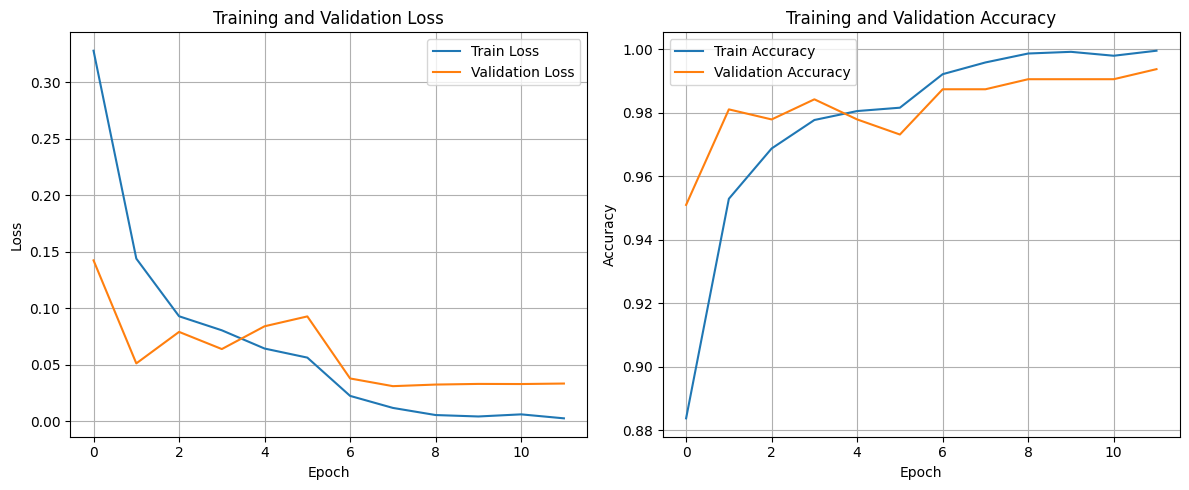

In [14]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Evaluation</p>

22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 648ms/step


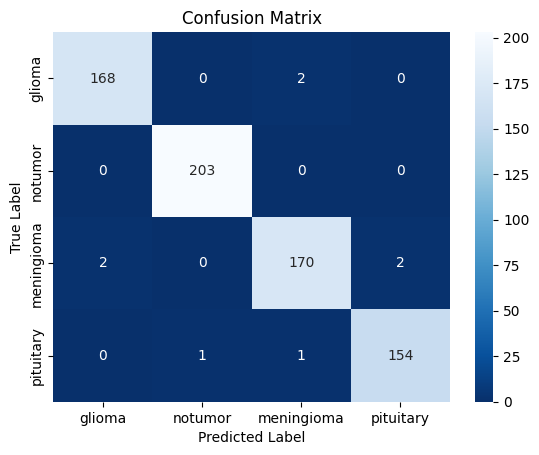

In [15]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1) 

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       170
           1       1.00      1.00      1.00       203
           2       0.98      0.98      0.98       174
           3       0.99      0.99      0.99       156

    accuracy                           0.99       703
   macro avg       0.99      0.99      0.99       703
weighted avg       0.99      0.99      0.99       703



In [18]:
model.save('EfficientNetV2S.h5')  # Simpan model


In [20]:
# Simpan arsitektur model
json_config = model.to_json()
with open('model_configEfficientNetV2S.json', 'w') as json_file:
    json_file.write(json_config)


In [22]:
model.save_weights('EfficientNetV2S.weights.h5')  # Simpan bobot model dengan nama yang valid


In [23]:
model.save('EfficientNetV2S.keras')  # Simpan model dalam format .keras


## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Prediction</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted label: notumor 
Actual label: notumor 
Confidence: 100.00%



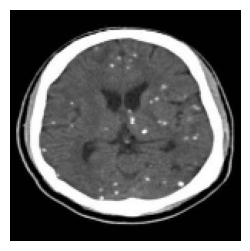

In [24]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]  
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)  
actual_label = labels[actual_class]  

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')  
plt.show()

<a id="5"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">ResNet50</p>

ResNet-101, a 101-layer deep convolutional neural network, offers a pretrained version trained on over a million images from the ImageNet database. It excels in classifying images over 1000 object categories, demonstrating its adaptability in recognizing different objects and animals. ResNet-101, with an image input size of 224-by-224, uses extensive feature representations, making it a strong choice for a variety of image classification problems.

In [26]:
# Load the ResNet50 model pretrained on ImageNet without the top layers
resnet = tf.keras.applications.ResNet50(weights='imagenet', include_top=False,
                                        input_shape=(image_size, image_size, 3))

# Build the custom model on top of the ResNet50 base
model2 = resnet.output
model2 = tf.keras.layers.GlobalAveragePooling2D()(model2)
model2 = tf.keras.layers.Dropout(rate=0.5)(model2)
model2 = tf.keras.layers.Dense(4, activation='softmax')(model2)
model2 = tf.keras.models.Model(inputs=resnet.input, outputs=model2)

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary (optional)
model2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 23,595,908 (90.01 MB)

 Trainable params: 23,542,788 (89.81 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [27]:
# Tensorboard callback for logging training metrics
tensorboard = TensorBoard(log_dir='logs')

# Modelcheckpoint callback to save the best model 
checkpoint = ModelCheckpoint("ResNet50.keras", monitor="val_accuracy",
                             save_best_only=True, verbose=1)

# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, 
                              min_delta=0.0001, verbose=1)

In [28]:
history = model2.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7744 - loss: 0.7142
Epoch 1: val_accuracy improved from -inf to 0.69620, saving model to ResNet50.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.7748 - loss: 0.7127 - val_accuracy: 0.6962 - val_loss: 13.5472 - learning_rate: 0.0010
Epoch 2/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9389 - loss: 0.1868
Epoch 2: val_accuracy did not improve from 0.69620
178/178 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - accuracy: 0.9389 - loss: 0.1867 - val_accuracy: 0.5427 - val_loss: 3.5830 - learning_rate: 0.0010
Epoch 3/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9547 - loss: 0.1277
Epoch 3: val_accuracy did not improve from 0.69620

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
178/178 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - accuracy: 0.9547 - loss: 0.1278 - val_accuracy: 0.2674 - val_loss: 427.6305 - learning_rate: 0.0010
Epoch 4/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step -

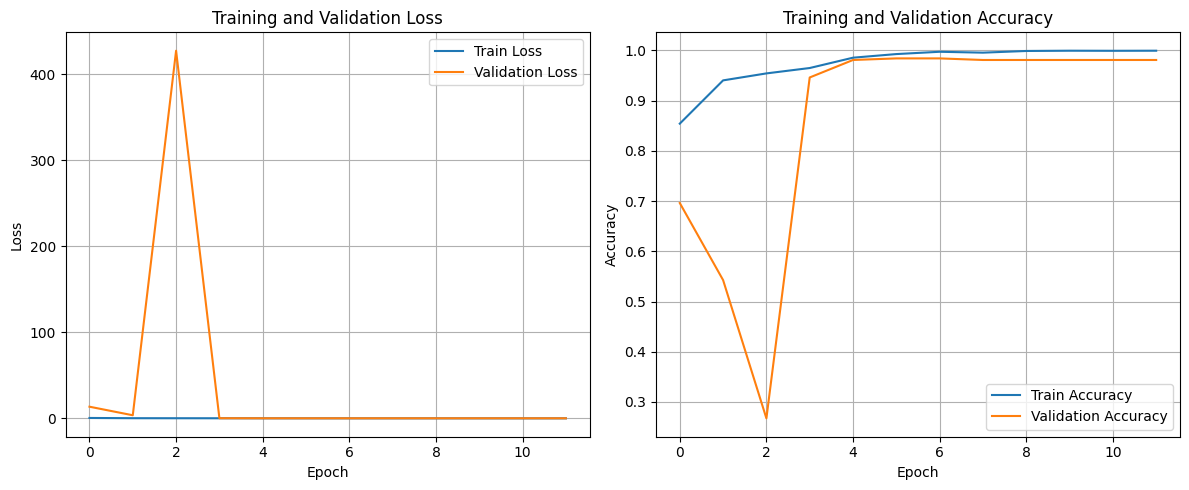

In [29]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Evaluation</p>

22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 533ms/step


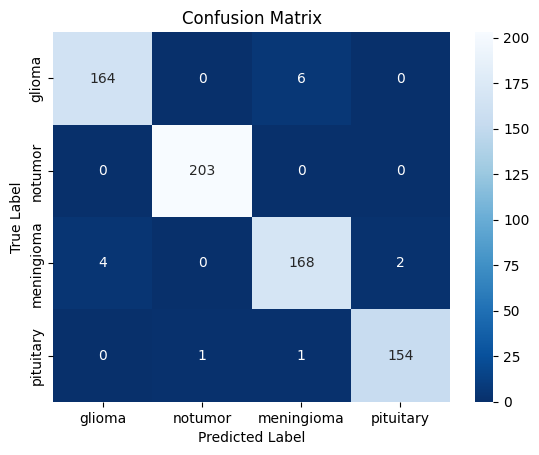

In [38]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model2.predict(X_test), axis=1) 

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       170
           1       1.00      1.00      1.00       203
           2       0.96      0.97      0.96       174
           3       0.99      0.99      0.99       156

    accuracy                           0.98       703
   macro avg       0.98      0.98      0.98       703
weighted avg       0.98      0.98      0.98       703



In [40]:
model2.save('ResNet50.h5')  # Simpan model


In [41]:
# Simpan arsitektur model
json_config = model2.to_json()
with open('model_ResNet50.json', 'w') as json_file:
    json_file.write(json_config)


In [42]:
model2.save_weights('ResNet50.weights.h5')  # Simpan bobot model dengan nama yang valid


In [43]:
model.save('ResNet50.keras')  # Simpan model dalam format .keras


## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Prediction</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted label: meningioma 
Actual label: meningioma 
Confidence: 100.00%



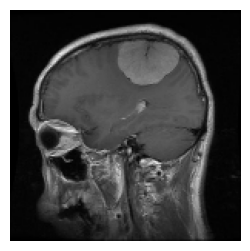

In [45]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]  
predictions = model2.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)  
actual_label = labels[actual_class]  

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')  
plt.show()

<a id="6"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Xception</p>

Xception, a revolutionary CNN architecture, incorporates depthwise separable convolutions, which reduces parameters and computational cost while maintaining efficacy. It uses separable convolutional blocks, an entry-exit flow structure, and skip connections similar to ResNet to provide efficient training and hierarchical feature learning. Key approaches include global depthwise convolutions for context understanding, data augmentation, batch normalization for stability, and transfer learning potential from ImageNet. With 71 layers, pretrained Xception performs at ImageNet classification, demonstrating its efficiency and adaptability in deep learning tasks.

In [46]:
# Load the Xception model pretrained on ImageNet without the top layers
xception = tf.keras.applications.Xception(weights='imagenet', include_top=False,
                                          input_shape=(image_size, image_size, 3))

# Build the custom model on top of the Xception base
model3 = xception.output
model3 = tf.keras.layers.GlobalAveragePooling2D()(model3)
model3 = tf.keras.layers.Dense(1536,activation='relu')(model3)
model3 = tf.keras.layers.Dropout(rate=0.5)(model3)
model3 = tf.keras.layers.Dense(4,activation='softmax')(model3)
model3 = tf.keras.models.Model(inputs=xception.input, outputs = model3)

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 74, 74,    │        864 │ input_layer_4[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 74, 74,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 74, 74,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 72, 72,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 72, 72,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 72, 72,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 72, 72,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 72, 72,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 72, 72,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 72, 72,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 72, 72,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 36, 36,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 36, 36,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 36,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 36, 36,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 36, 36,    │          0 │ add_12[0][0]    

 Total params: 24,014,892 (91.61 MB)

 Trainable params: 23,960,364 (91.40 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [48]:
# Tensorboard callback for logging training metrics
tensorboard = TensorBoard(log_dir='logs')

# Modelcheckpoint callback to save the best model 
checkpoint = ModelCheckpoint("Xception.keras", monitor="val_accuracy",
                             save_best_only=True, verbose=1)

# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, 
                              min_delta=0.0001, verbose=1)

In [49]:
history = model3.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7990 - loss: 0.6241
Epoch 1: val_accuracy improved from -inf to 0.62184, saving model to Xception.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 751s 4s/step - accuracy: 0.7994 - loss: 0.6230 - val_accuracy: 0.6218 - val_loss: 2.9296 - learning_rate: 0.0010
Epoch 2/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9541 - loss: 0.1494
Epoch 2: val_accuracy improved from 0.62184 to 0.94462, saving model to Xception.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 684s 4s/step - accuracy: 0.9541 - loss: 0.1495 - val_accuracy: 0.9446 - val_loss: 0.1887 - learning_rate: 0.0010
Epoch 3/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9587 - loss: 0.1553
Epoch 3: val_accuracy improved from 0.94462 to 0.95728, saving model to Xception.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 709s 4s/step - accuracy: 0.9587 - loss: 0.1553 - val_accuracy: 0.9573 - val_loss: 0.1756 - learning_rate: 0.0010
Epoch 4/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy

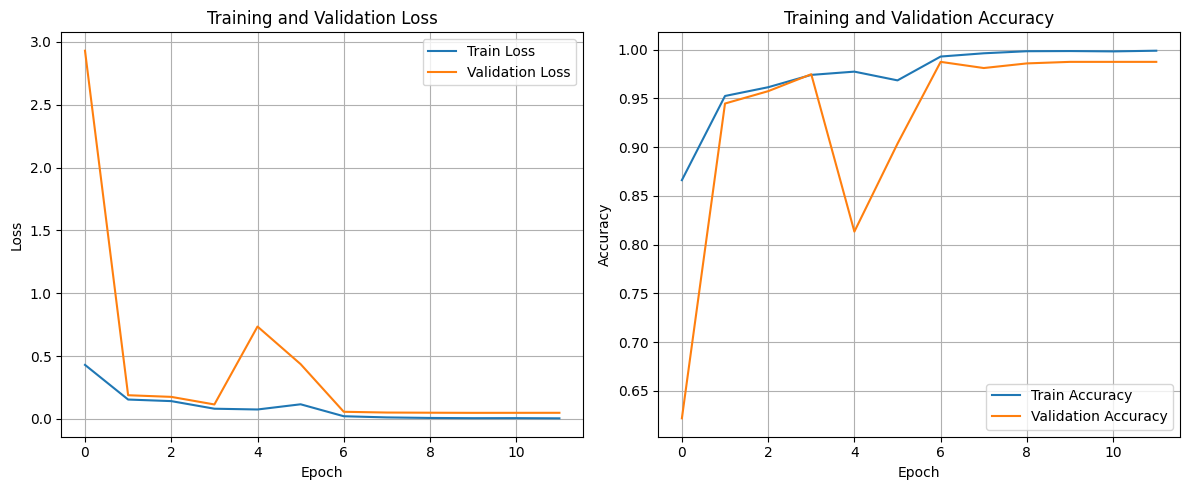

In [50]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
#

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Evaluation</p>

22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 592ms/step


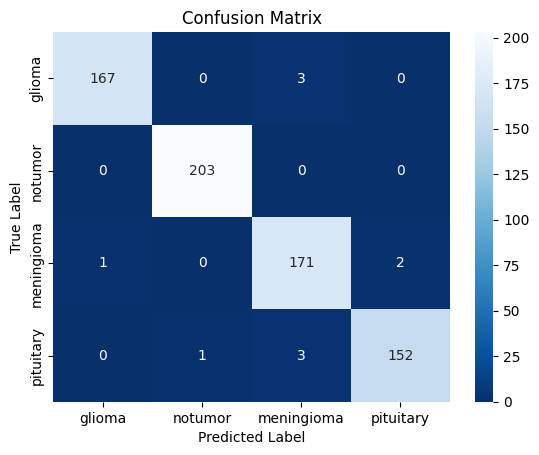

In [51]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model3.predict(X_test), axis=1) 

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       170
           1       1.00      1.00      1.00       203
           2       0.97      0.98      0.97       174
           3       0.99      0.97      0.98       156

    accuracy                           0.99       703
   macro avg       0.99      0.98      0.99       703
weighted avg       0.99      0.99      0.99       703



## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Prediction</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted label: notumor 
Actual label: notumor 
Confidence: 99.99%



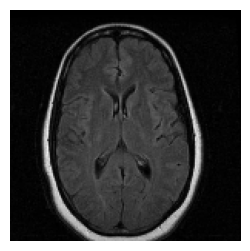

In [53]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]  
predictions = model3.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)  
actual_label = labels[actual_class] 

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')  
plt.show()


In [54]:
model3.save('Xception.h5')  # Simpan model


In [55]:
# Simpan arsitektur model
json_config = model3.to_json()
with open('model_configXception.json', 'w') as json_file:
    json_file.write(json_config)


In [56]:
model3.save_weights('Xception.weights.h5')  # Simpan bobot model dengan nama yang valid


In [57]:
model3.save('Xception.keras')  # Simpan model dalam format .keras


<a id="7"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Conclusion</p>

In [58]:
history_model1 = model.fit(X_train, y_train, validation_split=0.1, epochs=12, verbose=1, batch_size=32,
                            callbacks=[tensorboard, checkpoint, reduce_lr])

history_model2 = model2.fit(X_train, y_train, validation_split=0.1, epochs=12, verbose=1, batch_size=32,
                            callbacks=[tensorboard, checkpoint, reduce_lr])

history_model3 = model3.fit(X_train, y_train, validation_split=0.1, epochs=12, verbose=1, batch_size=32,
                            callbacks=[tensorboard, checkpoint, reduce_lr])


Epoch 1/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9996 - loss: 0.0015
Epoch 1: val_accuracy improved from 0.98734 to 0.99209, saving model to Xception.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9921 - val_loss: 0.0362 - learning_rate: 1.0000e-05
Epoch 2/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9992 - loss: 0.0021
Epoch 2: val_accuracy did not improve from 0.99209
178/178 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9921 - val_loss: 0.0340 - learning_rate: 1.0000e-05
Epoch 3/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9998 - loss: 0.0014
Epoch 3: val_accuracy improved from 0.99209 to 0.99367, saving model to Xception.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9937 - val_loss: 0.0324 - learning_rate: 1.0000e-05
Epoch 4/12
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9993 - loss: 0.00

KeyboardInterrupt: 

NameError: name 'history2' is not defined

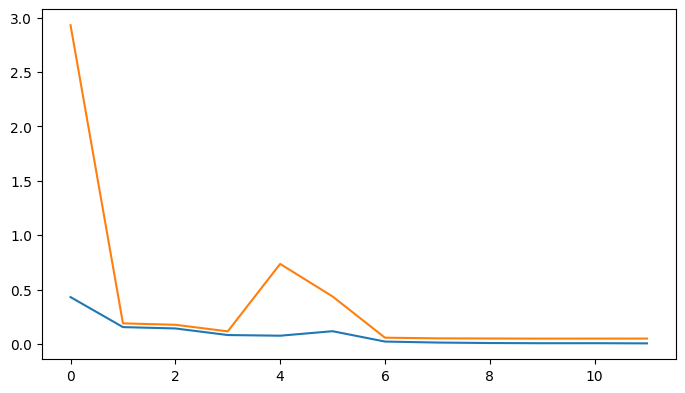

In [59]:
import matplotlib.pyplot as plt

# Assuming history, history2, and history3 contain training results for model, model2, and model3

plt.figure(figsize=(18, 10))

# Plotting training and validation loss for all models
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Model 1 Train Loss')
plt.plot(history.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history2.history['loss'], label='Model 2 Train Loss', linestyle='--')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss', linestyle='--')
plt.plot(history3.history['loss'], label='Model 3 Train Loss', linestyle=':')
plt.plot(history3.history['val_loss'], label='Model 3 Validation Loss', linestyle=':')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting training and validation accuracy for all models
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Model 1 Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Train Accuracy', linestyle='--')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy', linestyle='--')
plt.plot(history3.history['accuracy'], label='Model 3 Train Accuracy', linestyle=':')
plt.plot(history3.history['val_accuracy'], label='Model 3 Validation Accuracy', linestyle=':')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

In [60]:
import numpy as np

# Pastikan ketiga model sudah dilatih dan disimpan
# model1, model2, model3

# Lakukan prediksi probabilitas pada data uji
pred1 = model.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

# Averaging Probabilities (Soft Voting)
final_predictions_prob = (pred1 + pred2 + pred3) / 3

# Konversi probabilitas ke kelas akhir
final_predictions = np.argmax(final_predictions_prob, axis=1)

# Evaluasi hasil ensamble
from sklearn.metrics import classification_report, accuracy_score
y_true_test = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_test, final_predictions))

print("Accuracy:", accuracy_score(y_true_test, final_predictions))


22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 557ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 561ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 657ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       170
           1       1.00      1.00      1.00       203
           2       0.98      0.99      0.98       174
           3       0.99      0.99      0.99       156

    accuracy                           0.99       703
   macro avg       0.99      0.99      0.99       703
weighted avg       0.99      0.99      0.99       703

Accuracy: 0.9900426742532006


22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 550ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 618ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 612ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       170
           1       1.00      1.00      1.00       203
           2       0.98      0.99      0.98       174
           3       0.99      0.99      0.99       156

    accuracy                           0.99       703
   macro avg       0.99      0.99      0.99       703
weighted avg       0.99      0.99      0.99       703

Accuracy: 0.9900426742532006


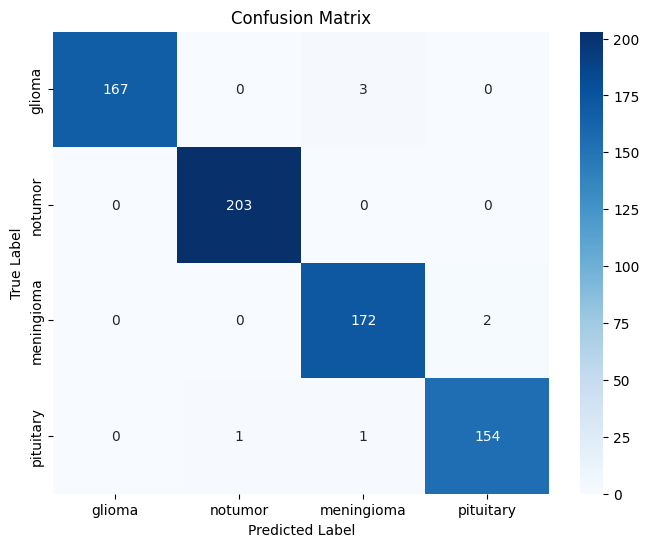

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Pastikan ketiga model sudah dilatih dan disimpan
# model1, model2, model3

# Lakukan prediksi probabilitas pada data uji
pred1 = model.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

# Averaging Probabilities (Soft Voting)
final_predictions_prob = (pred1 + pred2 + pred3) / 3

# Konversi probabilitas ke kelas akhir
final_predictions = np.argmax(final_predictions_prob, axis=1)

# Evaluasi hasil ensamble
y_true_test = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_test, final_predictions))

print("Accuracy:", accuracy_score(y_true_test, final_predictions))

# Confusion Matrix
cm = confusion_matrix(y_true_test, final_predictions)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


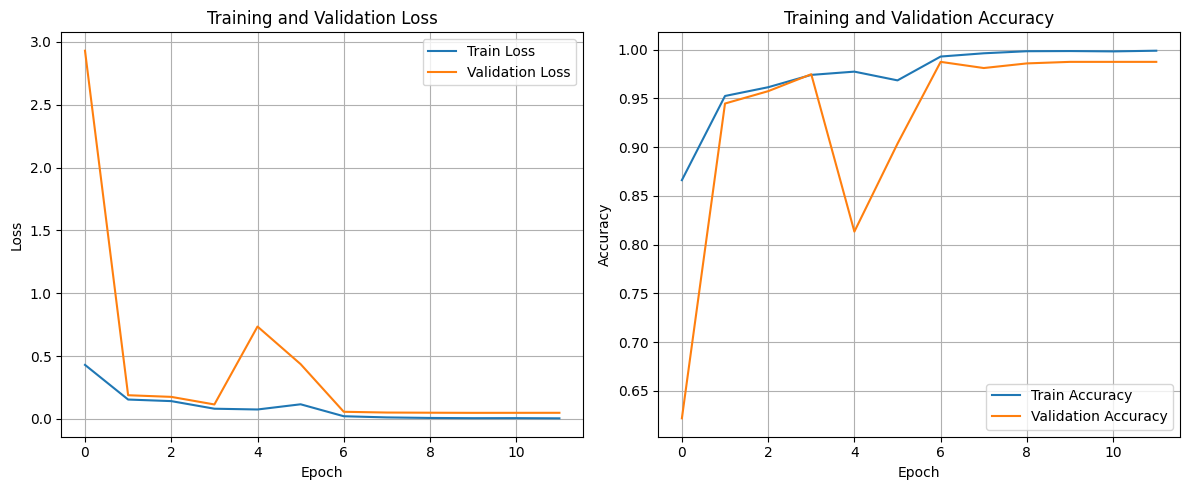

In [63]:
import matplotlib.pyplot as plt

# Membuat plot
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Menyesuaikan tata letak
plt.tight_layout()

# Tampilkan plot
plt.show()


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prediksi probabilitas untuk data latih
stack_train = np.hstack([
    model.predict(X_train),
    model2.predict(X_train),
    model3.predict(X_train)
])

# Label sebenarnya
y_train_stack = np.argmax(y_train, axis=1)

# Train meta-model
meta_model = LogisticRegression()
meta_model.fit(stack_train, y_train_stack)

# Prediksi pada data uji
stack_test = np.hstack([
    model.predict(X_test),
    model2.predict(X_test),
    model3.predict(X_test)
])

final_predictions = meta_model.predict(stack_test)

# Evaluasi
print("Classification Report:")
print(classification_report(y_true_test, final_predictions))
print("Accuracy:", accuracy_score(y_true_test, final_predictions))


198/198 ━━━━━━━━━━━━━━━━━━━━ 118s 597ms/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 128s 648ms/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 130s 654ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 551ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 598ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 585ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       170
           1       1.00      1.00      1.00       203
           2       0.98      0.99      0.98       174
           3       0.99      0.99      0.99       156

    accuracy                           0.99       703
   macro avg       0.99      0.99      0.99       703
weighted avg       0.99      0.99      0.99       703

Accuracy: 0.9900426742532006


In [70]:
import pickle

# Save predictions to a pickle file
with open('final_predictions.pkl', 'wb') as f:
    pickle.dump(final_predictions, f)


In [71]:
import numpy as np

# Save predictions to a .npy file
np.save('final_predictions.npy', final_predictions)

# Save predictions to a .csv file
np.savetxt('final_predictions.csv', final_predictions, delimiter=',')


In [64]:
import numpy as np
import pickle

# Save ensemble model in various formats
ensemble_model.save('ensemble_model.h5')  # Save in .h5 format
ensemble_model.save('ensemble_model.keras')  # Save in .keras format

# Save model architecture as JSON
json_config = ensemble_model.to_json()
with open('ensemble_model.json', 'w') as json_file:
    json_file.write(json_config)

# Save model weights
ensemble_model.save_weights('ensemble_model_weights.h5')

# Save in TensorFlow's SavedModel format
ensemble_model.save('ensemble_model_tf', save_format='tf')

# Save meta-model or ensemble predictions using pickle
with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(ensemble_model, f)

NameError: name 'ensemble_model' is not defined

# <p><center style="color:#003166;font-family:newtimeroman;;">Thank You!</center></p>